In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()

In [2]:
macro_list = ["dp", "ep", "bm", "ntis", "tbl", "tms", "dfy", "svar"]

In [3]:
ENet_full = pd.read_parquet("project2/feature_importance/enet_full_importance.parquet")
GLM_full = pd.read_parquet("project2/feature_importance/GLM_top_g_importance.parquet")
OLS_full = pd.read_parquet("project2/feature_importance/ols_full_importance.parquet")

RF_full = pd.read_csv("project2/feature_importance/RF_feature_importances_top.csv")
XGBoost_full = pd.read_csv("project2/feature_importance/XGBfeature_importances_all.csv")
NN1_full = pd.read_parquet("project2/feature_importance/top_Importance_NN1.parquet")
NN2_full = pd.read_parquet("project2/feature_importance/top_Importance_NN2.parquet")
NN3_full = pd.read_parquet("project2/feature_importance/top_Importance_NN3.parquet")
NN4_full = pd.read_parquet("project2/feature_importance/top_Importance_NN4.parquet")
NN5_full = pd.read_parquet("project2/feature_importance/top_Importance_NN5.parquet")


In [4]:
PCR_full = pd.read_parquet("project2/feature_importance/PCA_full_x_importance(2).parquet")
PLS_full = pd.read_parquet("project2/feature_importance/PLS_full_y_x_importance(1).parquet")

In [5]:
PCR_full = PCR_full.reset_index()
PLS_full = PLS_full.reset_index()
PLS_full

,Feature,Importance
0,absacc,0.000016
1,absacc_macro_bm,0.000016
2,absacc_macro_dfy,0.001606
3,absacc_macro_ntis,0.000395
4,absacc_macro_svar,0.005139
...,...,...
915,zerotrade_macro_svar,0.007409
916,zerotrade_macro_tbl,0.000353
917,zerotrade_macro_tms,0.000786
918,zerotrade_marco_dp,0.000012


In [ ]:
dataframes = {
    "OLS": OLS_full,
    "PLS": PLS_full,
    "PCR": PCR_full,
    "ENet": ENet_full,
    "GLM": GLM_full,
    "RF": RF_full,
    "XGBoost": XGBoost_full,
    "NN1": NN1_full,
    "NN2": NN2_full,
    "NN3": NN3_full,
    "NN4": NN4_full,
    "NN5": NN5_full
}

for model_name, df in dataframes.items():
    df.columns = ['Feature', 'Importance']  
    dataframes[model_name] = df.rename(columns={"Importance": model_name})  

feature_full = None
for model_name, df in dataframes.items():
    if feature_full is None:
        feature_full = df
    else:
        feature_full = feature_full.merge(df[['Feature', model_name]], on='Feature', how='outer')

print(feature_full)

                  Feature       OLS       PLS       PCR      ENet  \
0                  absacc  0.000127  0.000016  0.001051  0.000000   
1         absacc_macro_bm  0.000561  0.000016  0.000694  0.000000   
2        absacc_macro_dfy  0.000041  0.001606  0.000013  0.000000   
3       absacc_macro_ntis  0.000233  0.000395  0.000011  0.000000   
4       absacc_macro_svar  0.000056  0.005139  0.000002  0.000000   
..                    ...       ...       ...       ...       ...   
915  zerotrade_macro_svar  0.000104  0.007409  0.000005  0.000000   
916   zerotrade_macro_tbl  0.000673  0.000353  0.000130  0.000000   
917   zerotrade_macro_tms  0.001503  0.000786  0.000045  0.000000   
918    zerotrade_marco_dp  0.002954  0.000012  0.008099  0.024823   
919    zerotrade_marco_ep  0.000781  0.000015  0.006409  0.000390   

              GLM        RF   XGBoost       NN1       NN2       NN3       NN4  \
0   -1.320785e-04  0.000870  0.000000  0.001294  0.001231  0.001208  0.001214   
1   -1.18

In [7]:
macro_merged = {}

for model_name in feature_full.columns[1:]:  
    model_importance = {}
    for stock_level_feature in macro_list:
        pattern = f'_{stock_level_feature}'
        
        matched_features = feature_full[
            feature_full['Feature'].str.contains(pattern, case=False)
        ]
        
        if not matched_features.empty:
            model_importance[stock_level_feature] = matched_features[model_name].sum()
    
    macro_merged[model_name] = model_importance

macro_merged_importances_df = pd.DataFrame(macro_merged).reset_index().rename(columns={'index': 'Feature'})

In [8]:
macro_merged_importances_df

,Feature,OLS,PLS,PCR,ENet,GLM,RF,XGBoost,NN1,NN2,NN3,NN4,NN5
0,dp,0.105901,0.000701,0.443071,0.659934,-0.036324,0.059176,0.060478,0.176538,0.145808,0.131314,0.128336,0.121853
1,ep,0.133774,0.000900,0.348439,0.122424,-0.001715,0.049145,0.109954,0.160670,0.139039,0.126061,0.124716,0.119635
2,bm,0.147409,0.003430,0.066821,0.069795,-0.162506,0.141911,0.070111,0.112869,0.110210,0.109005,0.112060,0.111210
3,ntis,0.068202,0.087895,0.001520,0.000000,-0.036953,0.032172,0.044890,0.081199,0.093212,0.099568,0.099536,0.102181
4,tbl,0.064655,0.037386,0.007498,0.000000,-0.135701,0.433838,0.274910,0.087178,0.095175,0.101494,0.101732,0.103112
5,tms,0.060796,0.095904,0.002445,0.000000,-0.037080,0.039793,0.072476,0.080898,0.092907,0.098929,0.098566,0.102045
6,dfy,0.015616,0.211113,0.001360,0.000000,-0.044205,0.058776,0.100005,0.079631,0.092620,0.098755,0.098482,0.101622
7,svar,0.004061,0.542972,0.000276,0.000000,-0.121199,0.152704,0.177170,0.078240,0.092362,0.098635,0.098385,0.101403


In [9]:
macro_importance = macro_merged_importances_df.copy()

for model in macro_importance.columns[1:]:
    macro_importance[model] = macro_importance[model] / macro_importance[model].sum()
macro_importance

,Feature,OLS,PLS,PCR,ENet,GLM,RF,XGBoost,NN1,NN2,NN3,NN4,NN5
0,dp,0.176380,0.000715,0.508441,0.774431,0.063096,0.061163,0.066460,0.205942,0.169282,0.152026,0.148914,0.141187
1,ep,0.222803,0.000918,0.399847,0.143665,0.002979,0.050795,0.120830,0.187431,0.161423,0.145944,0.144714,0.138617
2,bm,0.245513,0.003499,0.076680,0.081904,0.282284,0.146676,0.077045,0.131668,0.127953,0.126198,0.130028,0.128855
3,ntis,0.113591,0.089661,0.001744,0.000000,0.064190,0.033253,0.049330,0.094724,0.108219,0.115272,0.115496,0.118394
4,tbl,0.107684,0.038138,0.008604,0.000000,0.235722,0.448404,0.302101,0.101698,0.110497,0.117503,0.118044,0.119472
5,tms,0.101257,0.097831,0.002806,0.000000,0.064411,0.041129,0.079645,0.094372,0.107864,0.114532,0.114371,0.118236
6,dfy,0.026009,0.215355,0.001560,0.000000,0.076788,0.060750,0.109897,0.092894,0.107531,0.114331,0.114274,0.117746
7,svar,0.006763,0.553883,0.000317,0.000000,0.210530,0.157831,0.194693,0.091271,0.107232,0.114193,0.114161,0.117493


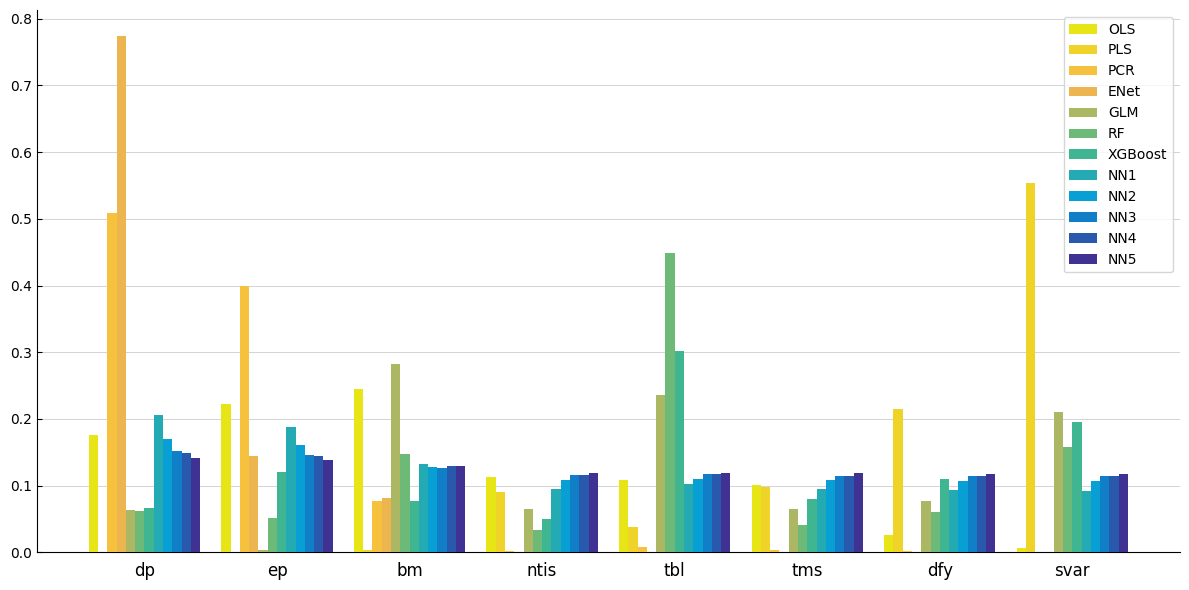

In [20]:
import matplotlib.colors as mcolors
models = ["OLS", "PLS", "PCR", "ENet", "GLM", "RF", "XGBoost", "NN1", "NN2", "NN3", "NN4", "NN5"]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.07  
x = np.arange(len(macro_list))  

custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ["#E7E515", "#FCB44A", "#4DBB82", "#009CDC","#403292"], N=len(models))
# cmap = plt.cm.Spectral_r
colors = [custom_cmap(i / len(models)) for i in range(len(models))] 

for i, (model, color) in enumerate(zip(models, colors)):
    ax.bar(
        x + i * bar_width,  
        macro_importance[model],  
        bar_width,
        label=model,
        color=color,  
        zorder=3  
    )

ax.set_xticks(x + (len(models) / 2 - 0.5) * bar_width)
ax.set_xticklabels(macro_list, fontsize=12)

ax.legend(loc='upper right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.7, zorder=0)
ax.tick_params(axis='y', direction='in')  
ax.tick_params(axis='x', bottom=False)  

plt.tight_layout()
plt.show()